In [ ]:
#importing required libraries
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
 
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#uploding data to colab
from google.colab import files
uploaded = files.upload()

Saving BankBranches Dataset.xls to BankBranches Dataset.xls


In [ ]:
#reading the data
data = pd.read_excel(r'BankBranches Dataset.xls')
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,Performance
0,65,118,-5,49,26,94,149,-3,114,37,92,89,44,-8,64,104,26,39,67,15,46,Efficient
1,-19,157,24,67,68,4,-22,54,112,33,38,14,23,32,53,163,16,29,143,-11,8,Efficient
2,-14,81,27,63,32,-64,77,47,51,-13,-22,53,119,85,98,35,10,18,89,133,114,Semiefficient
3,136,133,53,106,44,59,-41,-29,-4,-45,53,10,170,41,30,89,78,69,1,-26,94,Semiefficient
4,67,1,46,0,72,43,-41,-21,103,-25,48,69,153,129,101,140,140,22,135,97,54,Efficient


In [ ]:
#identifying features data typesl. All the features are int ==> we have one categorical feature (Performance) ==> just encode performance
data.dtypes

v1              int64
v2              int64
v3              int64
v4              int64
v5              int64
v6              int64
v7              int64
v8              int64
v9              int64
v10             int64
v11             int64
v12             int64
v13             int64
v14             int64
v15             int64
v16             int64
v17             int64
v18             int64
v19             int64
v20             int64
v21             int64
Performance    object
dtype: object

In [ ]:
#Encoding Performance
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['Performance']= le.fit_transform(data['Performance'])
data['Performance']

0       0
1       0
2       2
3       2
4       0
       ..
3498    0
3499    2
3500    1
3501    1
3502    2
Name: Performance, Length: 3503, dtype: int64

In [ ]:
#chicking # of missing values for each feature. there is no missed value
data.isnull().sum()

v1             0
v2             0
v3             0
v4             0
v5             0
v6             0
v7             0
v8             0
v9             0
v10            0
v11            0
v12            0
v13            0
v14            0
v15            0
v16            0
v17            0
v18            0
v19            0
v20            0
v21            0
Performance    0
dtype: int64

In [ ]:
#checking # of records, data types and # of missing values in a single step
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   v1           3503 non-null   int64
 1   v2           3503 non-null   int64
 2   v3           3503 non-null   int64
 3   v4           3503 non-null   int64
 4   v5           3503 non-null   int64
 5   v6           3503 non-null   int64
 6   v7           3503 non-null   int64
 7   v8           3503 non-null   int64
 8   v9           3503 non-null   int64
 9   v10          3503 non-null   int64
 10  v11          3503 non-null   int64
 11  v12          3503 non-null   int64
 12  v13          3503 non-null   int64
 13  v14          3503 non-null   int64
 14  v15          3503 non-null   int64
 15  v16          3503 non-null   int64
 16  v17          3503 non-null   int64
 17  v18          3503 non-null   int64
 18  v19          3503 non-null   int64
 19  v20          3503 non-null   int64
 20  v21     

In [ ]:
#statistical overview of numeric features
data.describe()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,Performance
count,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000,3503.000000
mean,39.961747,56.997716,44.621753,41.463603,50.066514,22.390237,60.510991,40.053954,54.863260,59.470168,48.314302,43.706823,79.707679,45.065087,69.803026,66.057665,68.210677,40.135027,63.809021,52.870968,81.655438,0.950043
std,58.418416,61.176566,54.273478,41.337543,29.265936,58.178641,63.436116,40.622592,46.267459,61.792015,48.476301,37.332447,52.313695,53.659829,48.952272,56.568417,44.459192,43.892817,47.636537,48.800231,60.659932,0.813622
min,-60.000000,-45.000000,-50.000000,-30.000000,0.000000,-80.000000,-51.000000,-31.000000,-24.000000,-47.000000,-36.000000,-21.000000,-10.000000,-46.000000,-16.000000,-32.000000,-9.000000,-35.000000,-19.000000,-31.000000,-22.000000,0.000000
25%,-11.000000,3.000000,-2.000000,5.000000,25.000000,-28.000000,6.000000,5.500000,14.000000,6.000000,6.000000,12.000000,35.000000,-2.000000,28.000000,17.000000,29.000000,2.000000,22.000000,9.000000,29.500000,0.000000
50%,40.000000,55.000000,45.000000,42.000000,50.000000,23.000000,61.000000,41.000000,56.000000,59.000000,49.000000,43.000000,79.000000,44.000000,68.000000,67.000000,68.000000,41.000000,63.000000,53.000000,80.000000,1.000000
75%,90.000000,110.500000,93.000000,78.000000,75.000000,73.000000,115.000000,75.000000,94.000000,113.000000,91.000000,75.000000,125.000000,92.000000,112.000000,116.000000,107.000000,78.000000,106.000000,95.000000,135.000000,2.000000
max,140.000000,164.000000,138.000000,112.000000,100.000000,121.000000,170.000000,109.000000,135.000000,167.000000,131.000000,109.000000,170.000000,139.000000,154.000000,163.000000,143.000000,116.000000,146.000000,138.000000,185.000000,2.000000


In [ ]:
#checking the distribution of data regarding to target feature(Performance) ==> the data distribution is balanced
data['Performance'].value_counts()

0    1251
1    1176
2    1076
Name: Performance, dtype: int64

In [ ]:
#checking mean of each feature regarding to each class ==> some features like v6, v16 , ... have different values for different classes significantly
performance_summary = data.groupby("Performance")
performance_summary.mean().reset_index()

,Performance,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21
0,0,37.586731,55.459632,48.713829,34.174261,50.306155,29.378897,56.982414,29.685851,97.757794,51.906475,41.680256,46.101519,81.422062,41.693046,71.840927,78.676259,60.095923,44.867306,70.257394,51.063949,76.790568
1,1,32.778912,40.118197,36.363095,34.774660,50.273810,7.356293,65.492347,45.745748,20.515306,85.060374,45.794218,40.751701,80.603741,35.797619,67.078231,80.589286,69.605442,35.931973,58.794218,44.522959,60.410714
2,2,50.573420,77.234201,48.890335,57.249071,49.561338,30.696097,59.169145,45.887546,42.532528,40.295539,58.781599,44.152416,76.735130,59.114312,70.411710,35.504647,76.120818,39.226766,61.792751,64.095725,110.530669


In [ ]:
#correlation of predictor features with performance
pd.DataFrame(abs(data.corr()['Performance']).sort_values(ascending = False))

,Performance
Performance,1.000000
v9,0.507691
v16,0.301903
v4,0.221629
v21,0.214973
v8,0.166290
v17,0.147325
v11,0.141627
v2,0.135956
v14,0.126463


In [ ]:
# getting the most important variables. 
corr = data.corr()**2
corr.Performance.sort_values(ascending=False)

Performance    1.000000
v9             0.257750
v16            0.091145
v4             0.049119
v21            0.046214
v8             0.027652
v17            0.021705
v11            0.020058
v2             0.018484
v14            0.015993
v20            0.010634
v1             0.007473
v19            0.005688
v10            0.004025
v18            0.003042
v13            0.001285
v12            0.000560
v7             0.000270
v15            0.000184
v5             0.000102
v3             0.000012
v6             0.000001
Name: Performance, dtype: float64

In [ ]:
#create a dataframe for predictor fatures (all features except Performance)
predictors= data.drop('Performance', axis= 1)

#creating a datafreme for target values
label= data['Performance']
label.unique()

array([0, 2, 1])

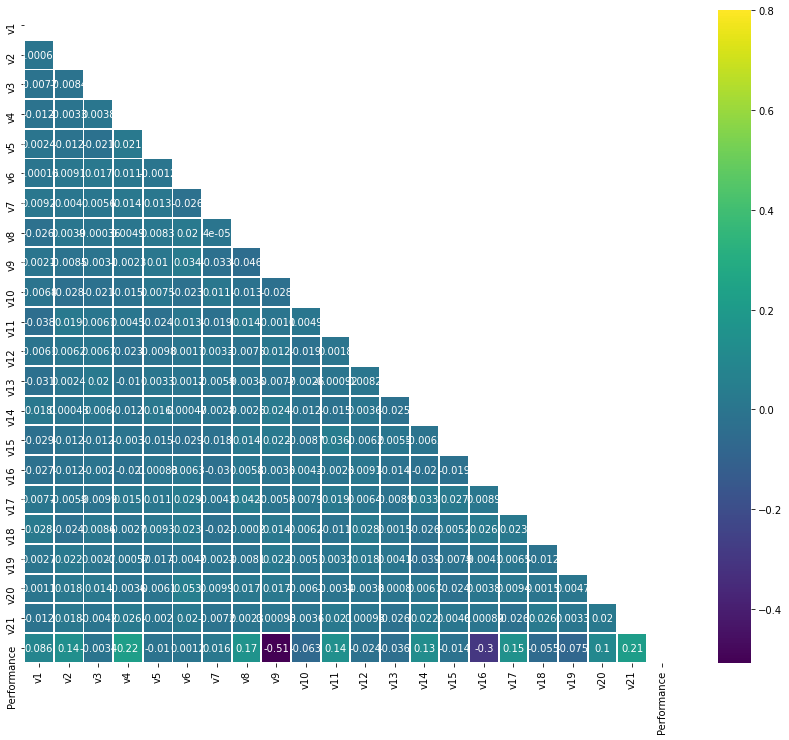

In [ ]:
cormat = data.corr()
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(15, 12))
sns.heatmap(cormat, vmax=0.8 , square= True, cmap='viridis',
            mask=mask,linewidths=.9, linecolor='white',
            fmt='.2g',
            annot=True)

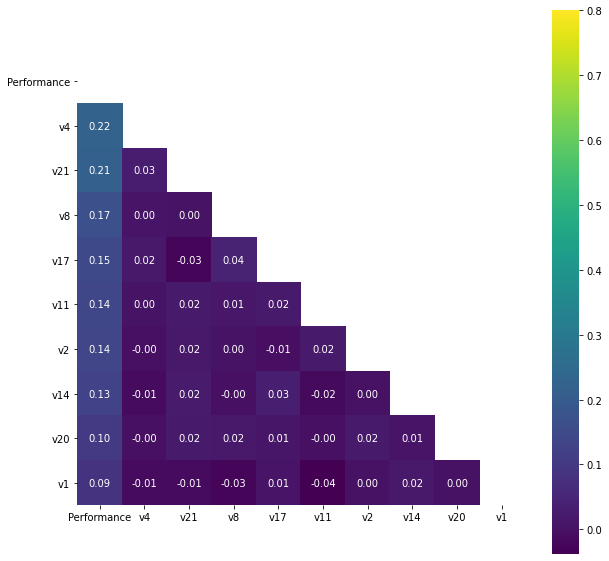

In [ ]:
# extracting and plotting most correlated feature with Performance ==> based on the following plot there is no significant multicolineartity between features
cols= cormat.nlargest(10, 'Performance')['Performance'].index # getting top 10 correlated features with Performance
cm=np.corrcoef(data[cols].values.T) # calculating correlation coefficients for the top 10 correlated features
mask = np.zeros_like(data[cols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of arr
plt.subplots(figsize=(10, 10))
sns.heatmap(cm, vmax=0.8, cmap='viridis', square=True, annot=True, fmt='.2f',
            annot_kws={'size' : 10}, yticklabels=cols.values, xticklabels=cols.values, mask=mask)
plt.show()

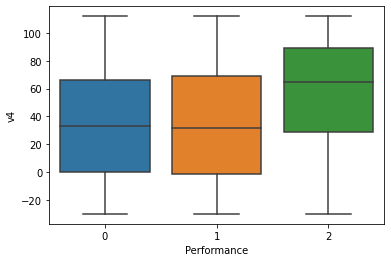

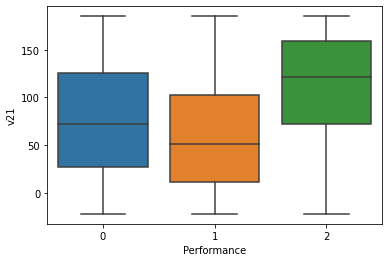

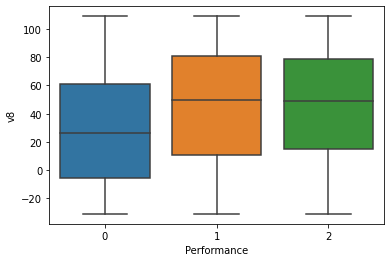

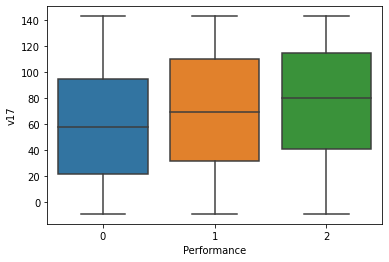

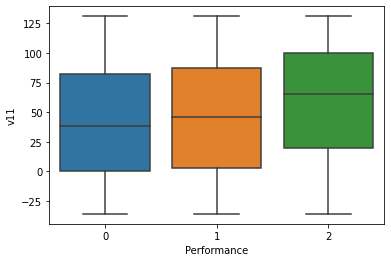

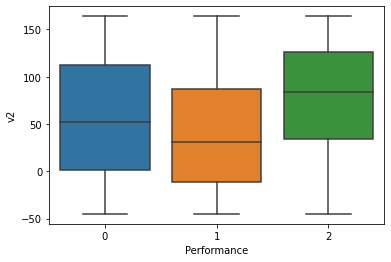

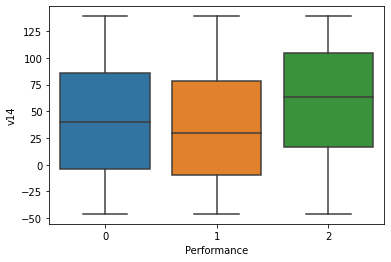

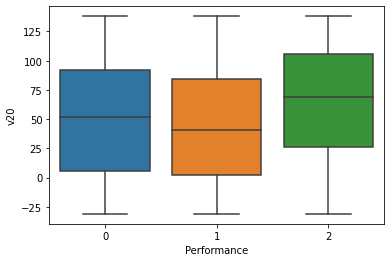

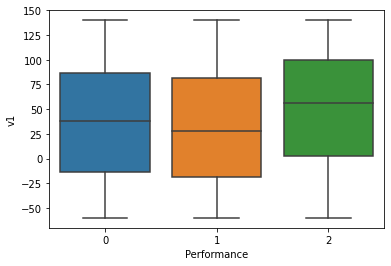

In [ ]:
#checking for outliers ==> there is no outlier value base on the following box plots.
for i in range(1,10):
    plt.figure()
    sns.boxplot(x= data['Performance'], y= data[cols[i]])
    plt.show()

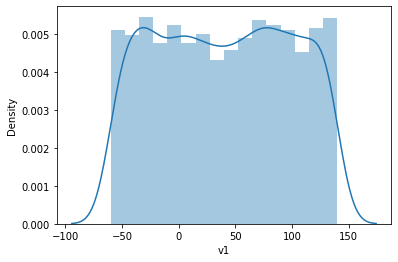

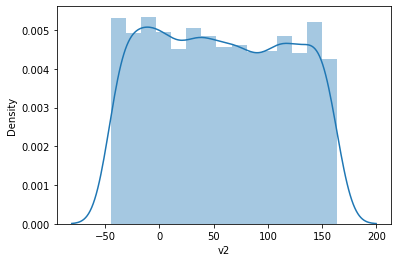

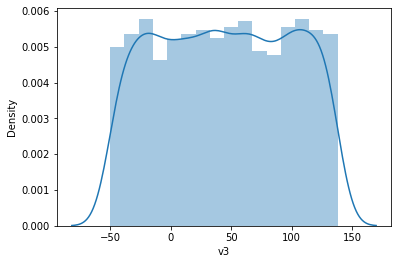

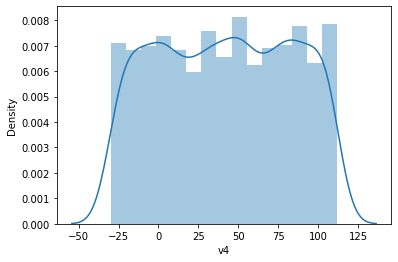

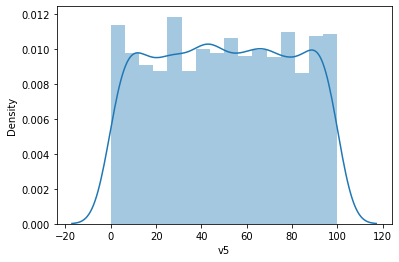

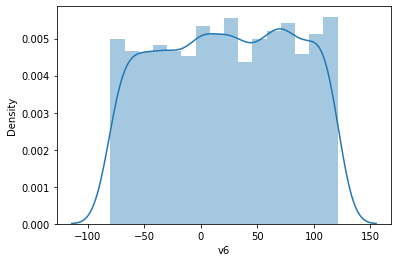

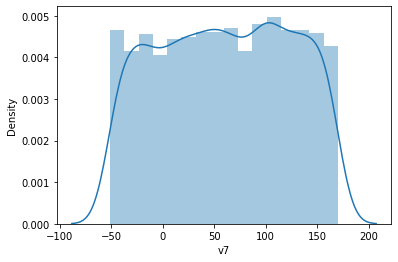

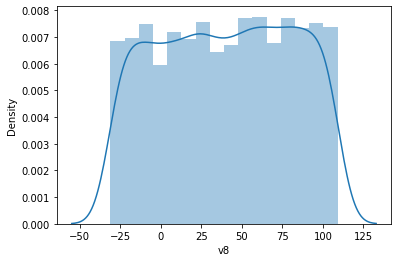

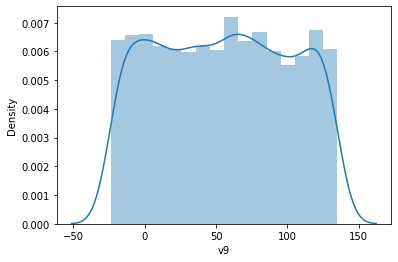

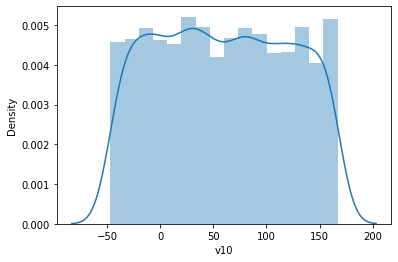

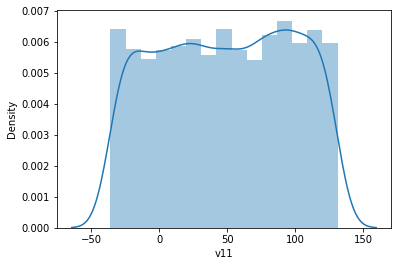

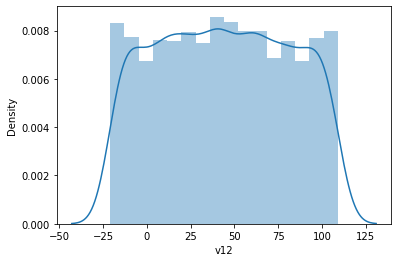

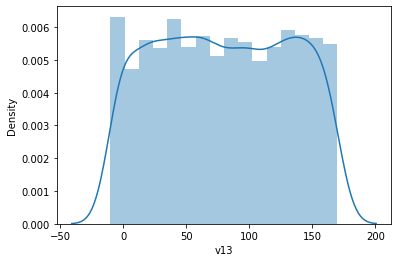

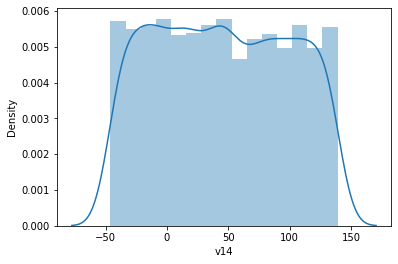

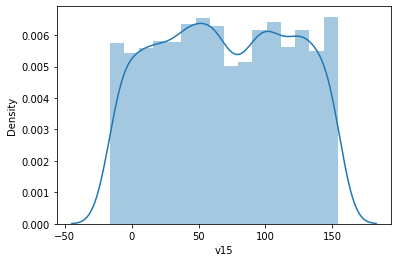

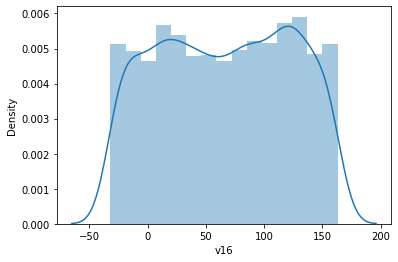

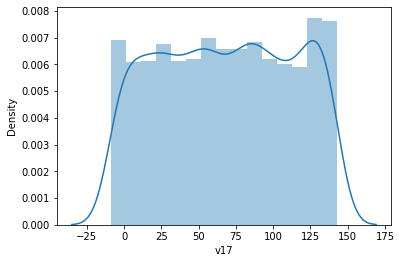

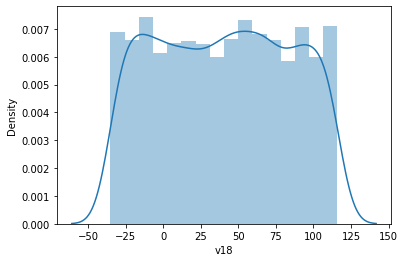

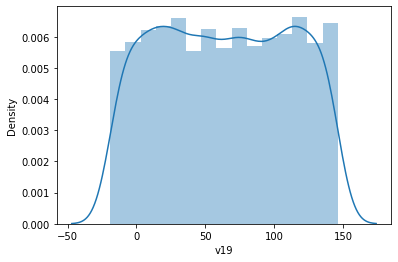

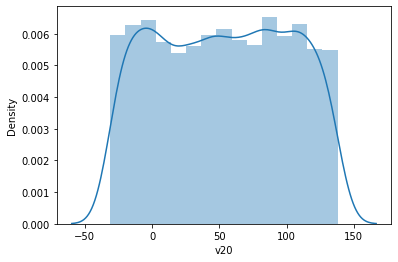

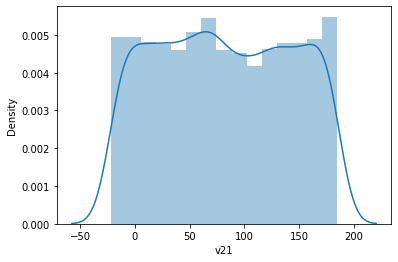

In [ ]:
#plotting distibution plot for all predictor features 
for c in predictors.columns:
    plt.figure()
    sns.distplot(predictors[c])

In [ ]:
#checking skewness for all predictor features ==> all skewness values are near zero ==> 
#we can consider they are normal ==> there is no need to data transformation to make them pure normal
for c in predictors.columns:
    print(c, ':', np.round(predictors[c].skew(), 3), '\n')

v1 : -0.004 

v2 : 0.047 

v3 : -0.009 

v4 : -0.016 

v5 : -0.004 

v6 : -0.046 

v7 : -0.039 

v8 : -0.04 

v9 : 0.016 

v10 : 0.03 

v11 : -0.043 

v12 : 0.011 

v13 : 0.009 

v14 : 0.041 

v15 : -0.005 

v16 : -0.032 

v17 : -0.019 

v18 : 0.004 

v19 : 0.004 

v20 : -0.008 

v21 : 0.023 



In [ ]:
#splittimg the data to train and test datasets
x_train, x_test, y_train, y_test = train_test_split(predictors, label,
                                                    test_size= 0.2, random_state= 123)

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#visualizing knn to find optimal k_value

# creating list of accuracy scores
scores = []
for k in range(1, 50):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)
    y_preds= KNN.predict(x_train)
    score = accuracy_score(y_train, y_preds)
    scores.append(score)
    

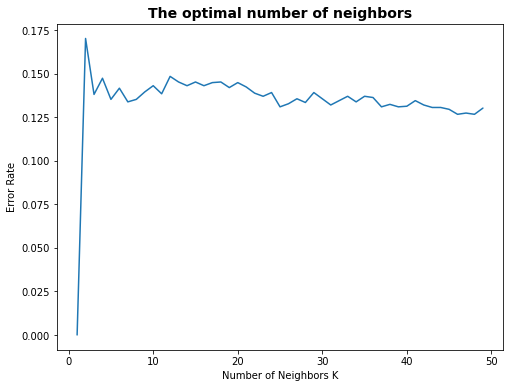

In [ ]:
# changing to error rate ==> 
#there is no significan difference between k-values greater than 4 but anyway 47 is the best value.
error_rate = [1 - x for x in scores]
 
plt.figure(figsize=(8,6))
plt.title('The optimal number of neighbors', fontsize=14, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=10)
plt.ylabel('Error Rate', fontsize=10)
sns.set_style("whitegrid")
plt.plot(range(1, 50), error_rate)
 
plt.show()

In [ ]:
treeclf = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=15, min_samples_leaf=10, max_depth= 5)
treeclf.fit(x_train, y_train)
y_preds= treeclf.predict(x_train)

In [ ]:
tree_text_Output = tree.export_text(treeclf)
print(tree_text_Output)

|--- feature_8 <= 66.50
|   |--- feature_15 <= 67.50
|   |   |--- feature_20 <= 89.50
|   |   |   |--- feature_8 <= 36.50
|   |   |   |   |--- feature_9 <= 33.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_9 >  33.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  36.50
|   |   |   |   |--- feature_9 <= 17.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_9 >  17.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_20 >  89.50
|   |   |   |--- feature_9 <= 85.00
|   |   |   |   |--- feature_3 <= 64.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_3 >  64.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_9 >  85.00
|   |   |   |   |--- feature_8 <= 29.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  29.00
|   |   |   |   |   |--- class: 2
|   |--- feature_15 >  67.50
|   |   |--- feature_8 <= 26.50
|   |   |   |--- feature_20 <= 65.50
|   |   |   |   |--- feature_9 <= 62.50
|   |  

In [ ]:
# Parameter Tunning using GridSearchCV
treeGD= DecisionTreeClassifier(random_state=123)
params = {'criterion':['gini','entropy'],
       'max_depth':[2, 3, 4, 5, 6, 7],
       'min_samples_split':[2, 3, 4, 5, 6, 7],
       'class_weight':['balanced',{0:0.1,1:0.9},{0:0.2,1:0.8}, {0:0.3, 1:0.7}]}
GSTree = GridSearchCV(treeGD, param_grid=params, cv=10, scoring='accuracy')
GSTree.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=123,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced', {0: 0.1, 1: 0.9},
      

In [ ]:
GSTree.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 2}

In [ ]:
GSTree.best_score_

0.7423411286222674

In [ ]:
MLP= MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', 
                   max_iter= 500, random_state=123)
MLP.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=123, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
svc = svm.SVC(kernel='rbf')
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# printing train and test dataset original values to compare with output confusion matrices of the algorithms
print('original target values for train dataset:\n', y_train.value_counts())
print('original target values for test dataset:\n', y_test.value_counts())
print('------------------------------------------------------------------')

#printing confusion matrix for all of the algorithms for comparison
clfs= [KNN, treeclf, GSTree, MLP, svc, GNB]
clf_texts = ['KNN', 'treeclf', 'GSTree', 'MLP', 'svc', 'GNB']
for clf, clf_texts in zip(clfs, clf_texts):
    print('------------', clf_texts,': ------------')
    y_preds_train= clf.predict(x_train)
    print('Confusion Matrix for Ttrain dataset:\n', confusion_matrix(y_train, y_preds_train))
    print('Accuracy for train dataset: ', np.round(accuracy_score(y_train, y_preds_train), 2), '\n')

    y_preds_test= clf.predict(x_test)
    print('Confusion Matrix for test dataset:\n', confusion_matrix(y_test, y_preds_test))
    print('Accuracy for test dataset: ', np.round(accuracy_score(y_test, y_preds_test), 2))

    print('=============================================================================')

original target values for train dataset:
 0    992
1    948
2    862
Name: Performance, dtype: int64
original target values for test dataset:
 0    259
1    228
2    214
Name: Performance, dtype: int64
------------------------------------------------------------------
------------ KNN : ------------
Confusion Matrix for Ttrain dataset:
 [[887  55  50]
 [ 59 839  50]
 [ 80  71 711]]
Accuracy for train dataset:  0.87 

Confusion Matrix for test dataset:
 [[225  13  21]
 [ 23 187  18]
 [ 36  19 159]]
Accuracy for test dataset:  0.81
------------ treeclf : ------------
Confusion Matrix for Ttrain dataset:
 [[856  70  66]
 [ 62 734 152]
 [157 165 540]]
Accuracy for train dataset:  0.76 

Confusion Matrix for test dataset:
 [[218  20  21]
 [ 14 181  33]
 [ 63  38 113]]
Accuracy for test dataset:  0.73
------------ GSTree : ------------
Confusion Matrix for Ttrain dataset:
 [[852  59  81]
 [ 33 822  93]
 [ 66 136 660]]
Accuracy for train dataset:  0.83 

Confusion Matrix for test dataset:
 [